In [15]:
setwd('/home/jovyan/Ziad/scanpy/')
library(clusterProfiler)
library(dplyr)

In [19]:
celltypes = list.files('out/DEG')
degs <- list()
for (x in celltypes){
    degs[[x]] <- as.list(list.files(paste0('out/DEG/', x, '/untreated_combined_filtered'), full.names= TRUE))
    names(degs[[x]]) <- gsub('_deg|_treated_vs_untreated_deg|.txt', '', list.files(paste0('out/DEG/', x, '/untreated_combined_filtered')))
    degs[[x]] <- lapply(degs[[x]], readr::read_tsv)
}

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  X1 = col_character(),
  scores = col_double(),
  logfoldchanges = col_double(),
  pvals = col_double(),
  pvals_adj = col_double()
)

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  X1 = col_character(),
  scores = col_double(),
  logfoldchanges = col_double(),
  pvals = col_double(),
  pvals_adj = col_double()
)

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  X1 = col_character(),
  scores = col_double(),
  logfoldchanges = col_double(),
  pvals = col_double(),
  pvals_adj = col_double()
)

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  X1 = col_character(),
  scores = col_double(),
  logfoldchanges = col_double(),
  pvals = col_double(),
  pvals_adj = col_double()
)

Warning message:
“Missing column names filled in: 'X1' [

In [21]:
# convert IDs to entrezgene_id
library(biomaRt)
mart <- useMart("ensembl", dataset="hsapiens_gene_ensembl")
m <- getBM(attributes=c("external_gene_name", "entrezgene_id"), mart=mart)

Cache found



In [22]:
# get up-regulated genes in each cluster
degs_sig <- lapply(degs, function(x) {
    y <- lapply(x, function(z)
        z %>% dplyr::filter(pvals_adj < 0.05 & logfoldchanges > 0) %>% dplyr::select(X1) %>% unlist %>% as.character)
        return(y)
    }
    )

In [23]:
# remove ribosomal and mito genes
degs_sig <- lapply(degs_sig, function(x){
    x <- lapply(x, function(y){
        z <- grepl('^RPS|^RPL|^MRPL|^MRPS|^MT-', y)
        y <- y[!z]
        # convert to entrez id
        y <- m$entrezgene_id[m$external_gene_name %in% y]
        y <- y[!is.na(y)]
        return(y)
    })
           return(x)}
)

In [26]:
# extract universeIDs
allgenes = readr::read_tsv('out/DEG/Treg/untreated_combined/Treg_2.5MIU_treated_vs_untreated_deg.txt')
allgenes = allgenes$X1
allgenes = allgenes[!grepl('^RPS|^RPL|^MRPL|^MRPS|^MT-', allgenes)]
universeID <- m$entrezgene_id[m$external_gene_name %in% allgenes]
universeID <- as.character(universeID[!is.na(universeID)])

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  X1 = col_character(),
  scores = col_double(),
  logfoldchanges = col_double(),
  pvals = col_double(),
  pvals_adj = col_double()
)



In [29]:
library(clusterProfiler)
library(org.Hs.eg.db)

res <- lapply(degs_sig, compareCluster, fun="enrichGO", OrgDb = org.Hs.eg.db, ont = 'BP', readable = TRUE, universe = universeID)

Loading required package: AnnotationDbi

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, ta

In [30]:
res_ <- lapply(res, simplify)

In [40]:
library(ggplot2)

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



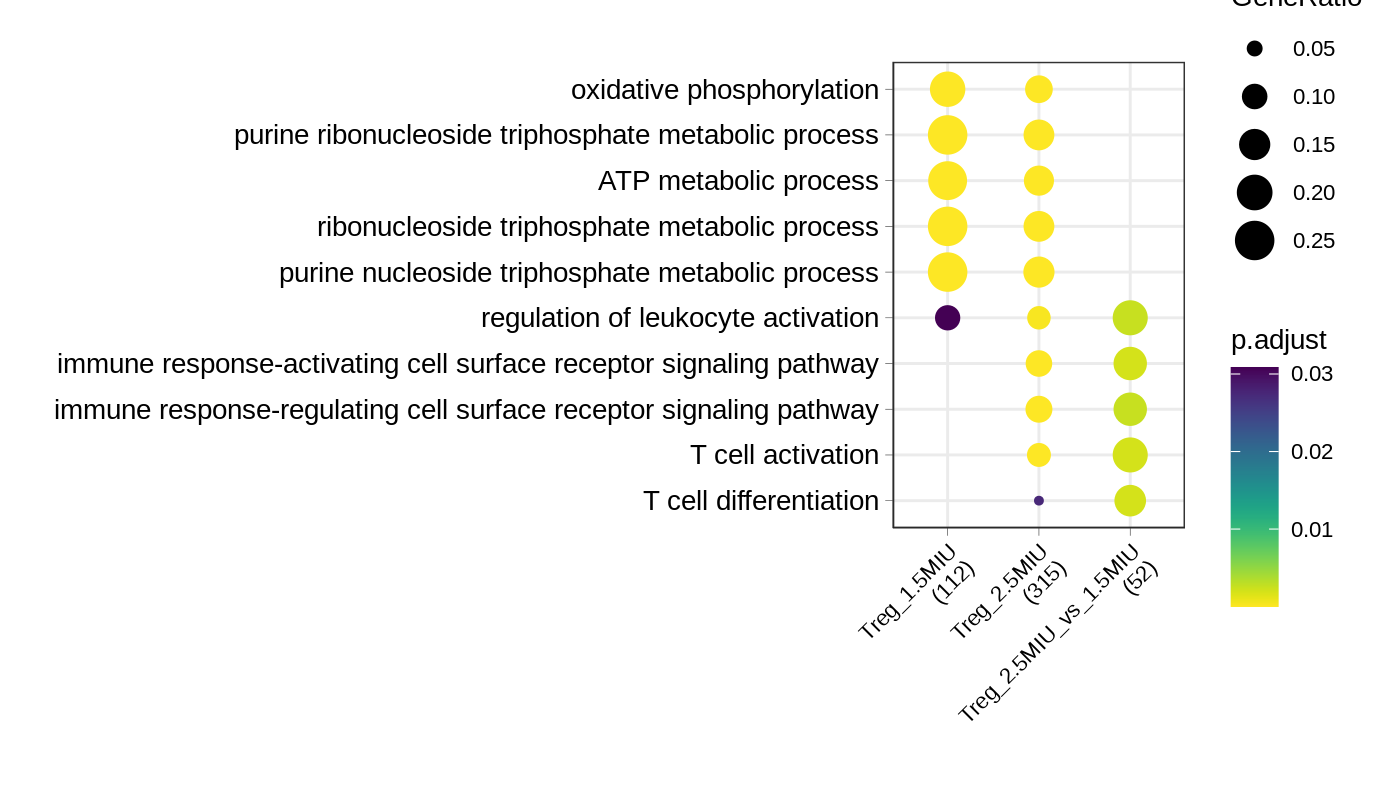

In [47]:
options(repr.plot.width = 7, repr.plot.height = 4, repr.plot.res = 200)
dotplot(res[['Treg']]) + ktplots::small_axis(fontsize = 10) + viridis::scale_color_viridis(direction = -1) + theme(axis.text.x = element_text(size=8, angle=45, hjust = 1))

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



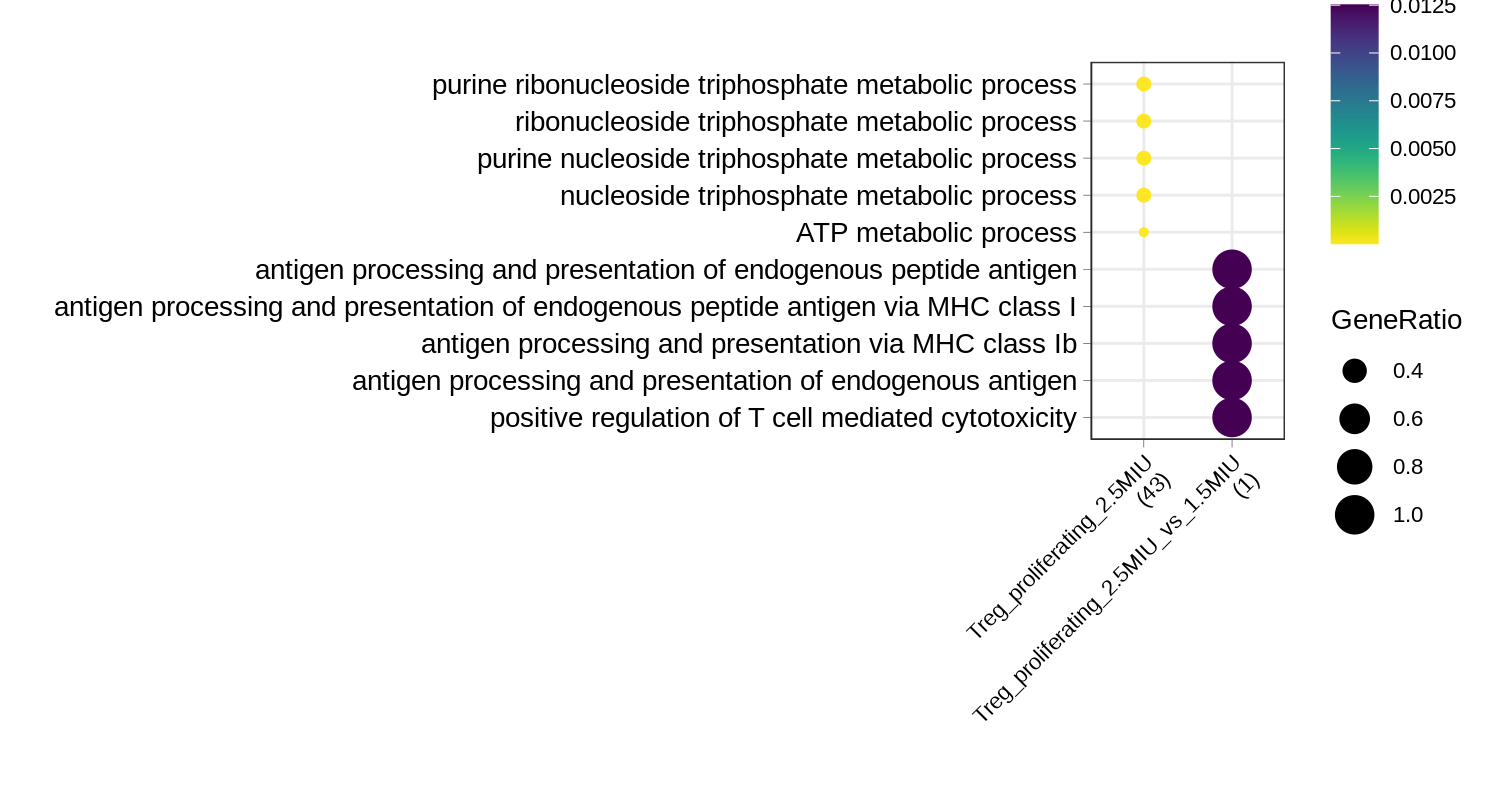

In [57]:
options(repr.plot.width = 7.5, repr.plot.height = 4, repr.plot.res = 200)
dotplot(res[['Treg_proliferating']]) + ktplots::small_axis(fontsize = 10) + viridis::scale_color_viridis(direction = -1) + theme(axis.text.x = element_text(size=8, angle=45, hjust = 1))

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



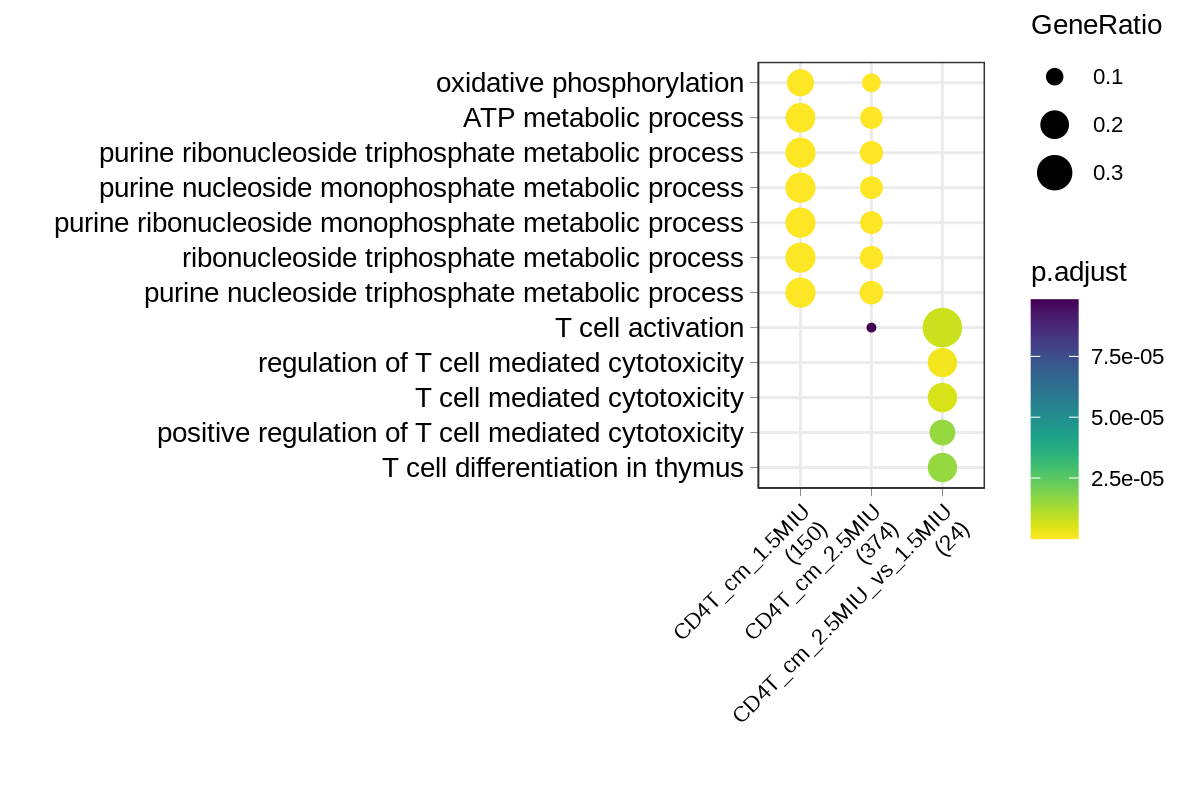

In [56]:
options(repr.plot.width = 6, repr.plot.height = 4, repr.plot.res = 200)
dotplot(res[['CD4T_cm']]) + ktplots::small_axis(fontsize = 10) + viridis::scale_color_viridis(direction = -1)+ theme(axis.text.x = element_text(size=8, angle=45, hjust = 1))

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



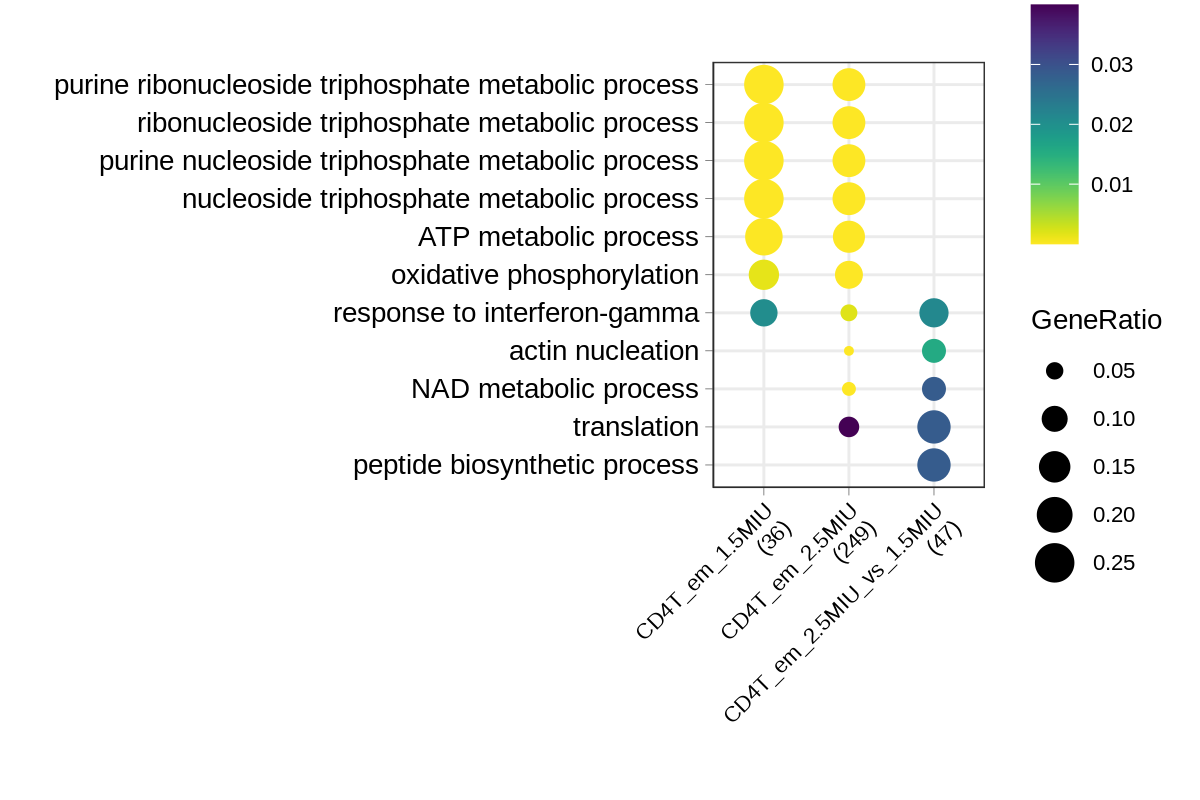

In [58]:
options(repr.plot.width = 6, repr.plot.height = 4, repr.plot.res = 200)
dotplot(res[['CD4T_em']]) + ktplots::small_axis(fontsize = 10) + viridis::scale_color_viridis(direction = -1)+ theme(axis.text.x = element_text(size=8, angle=45, hjust = 1))

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



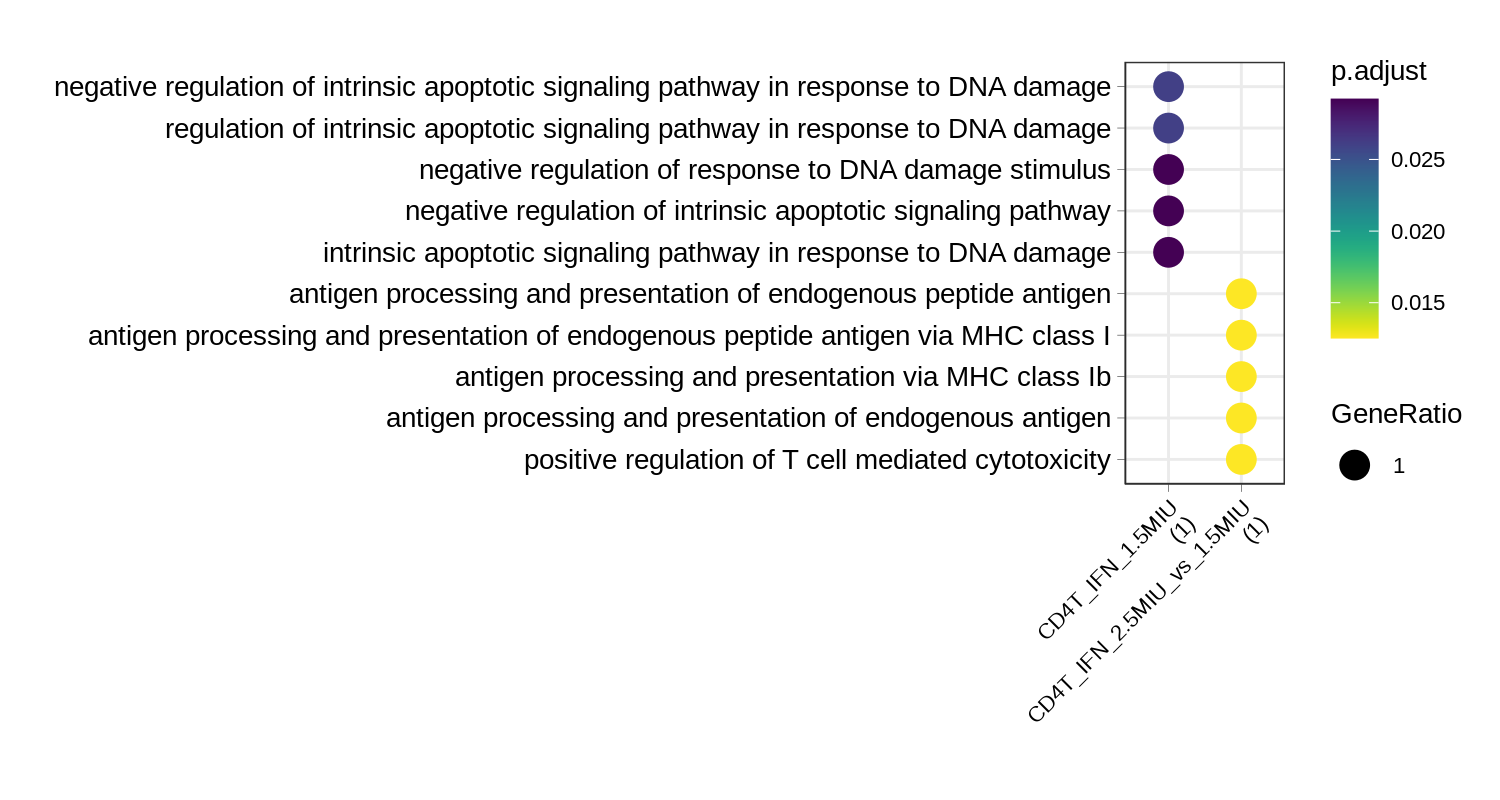

In [61]:
options(repr.plot.width = 7.5, repr.plot.height = 4, repr.plot.res = 200)
dotplot(res[['CD4T_IFN']]) + ktplots::small_axis(fontsize = 10) + viridis::scale_color_viridis(direction = -1)+ theme(axis.text.x = element_text(size=8, angle=45, hjust = 1))

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



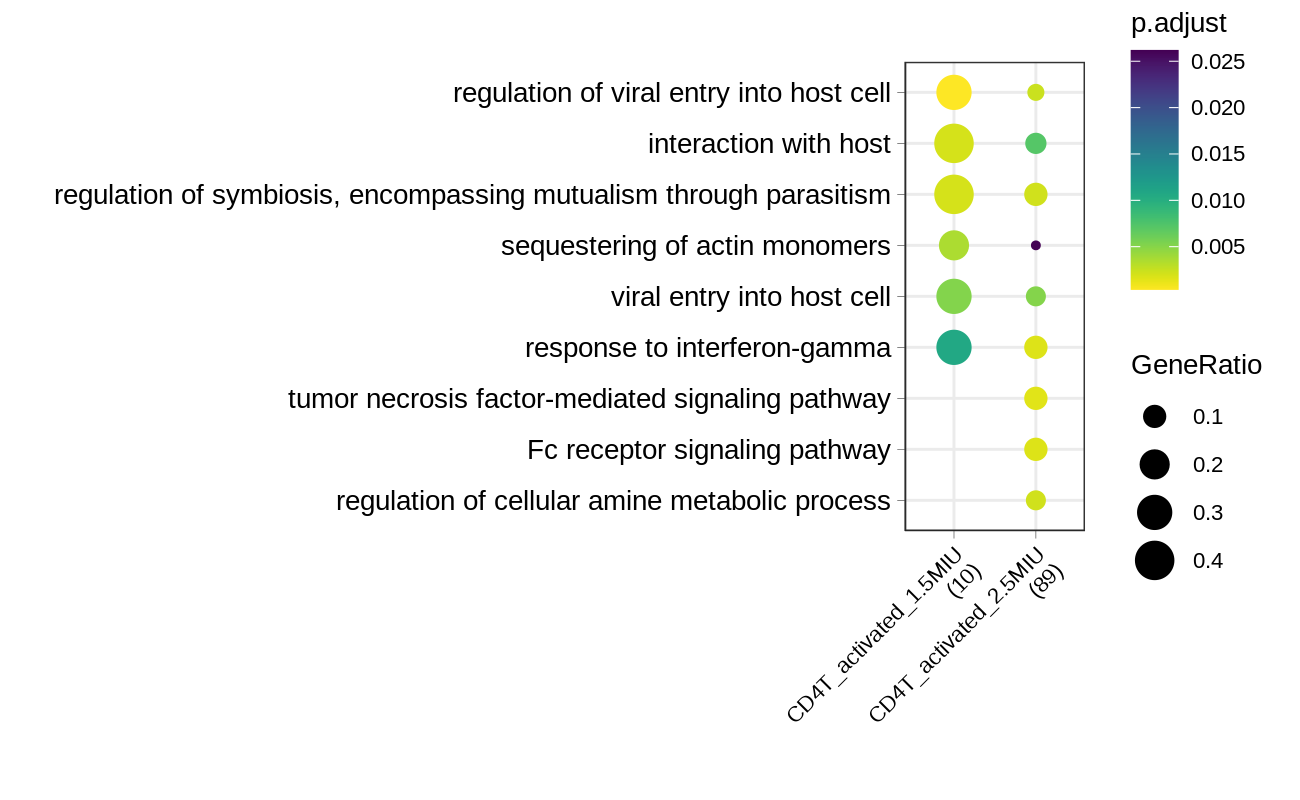

In [66]:
options(repr.plot.width = 6.5, repr.plot.height = 4, repr.plot.res = 200)
dotplot(res[['CD4T_activated']]) + ktplots::small_axis(fontsize = 10) + viridis::scale_color_viridis(direction = -1)+ theme(axis.text.x = element_text(size=8, angle=45, hjust = 1))

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



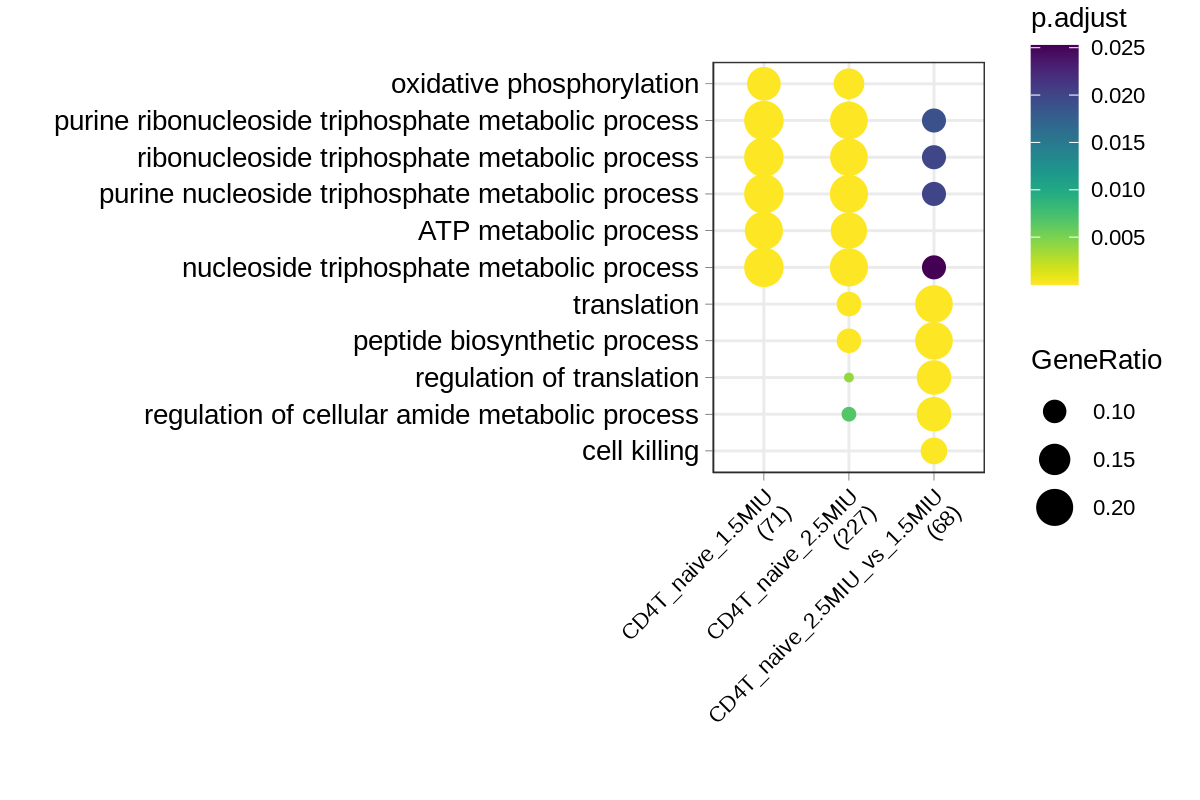

In [68]:
options(repr.plot.width = 6, repr.plot.height = 4, repr.plot.res = 200)
dotplot(res[['CD4T_naive']]) + ktplots::small_axis(fontsize = 10) + viridis::scale_color_viridis(direction = -1)+ theme(axis.text.x = element_text(size=8, angle=45, hjust = 1))

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



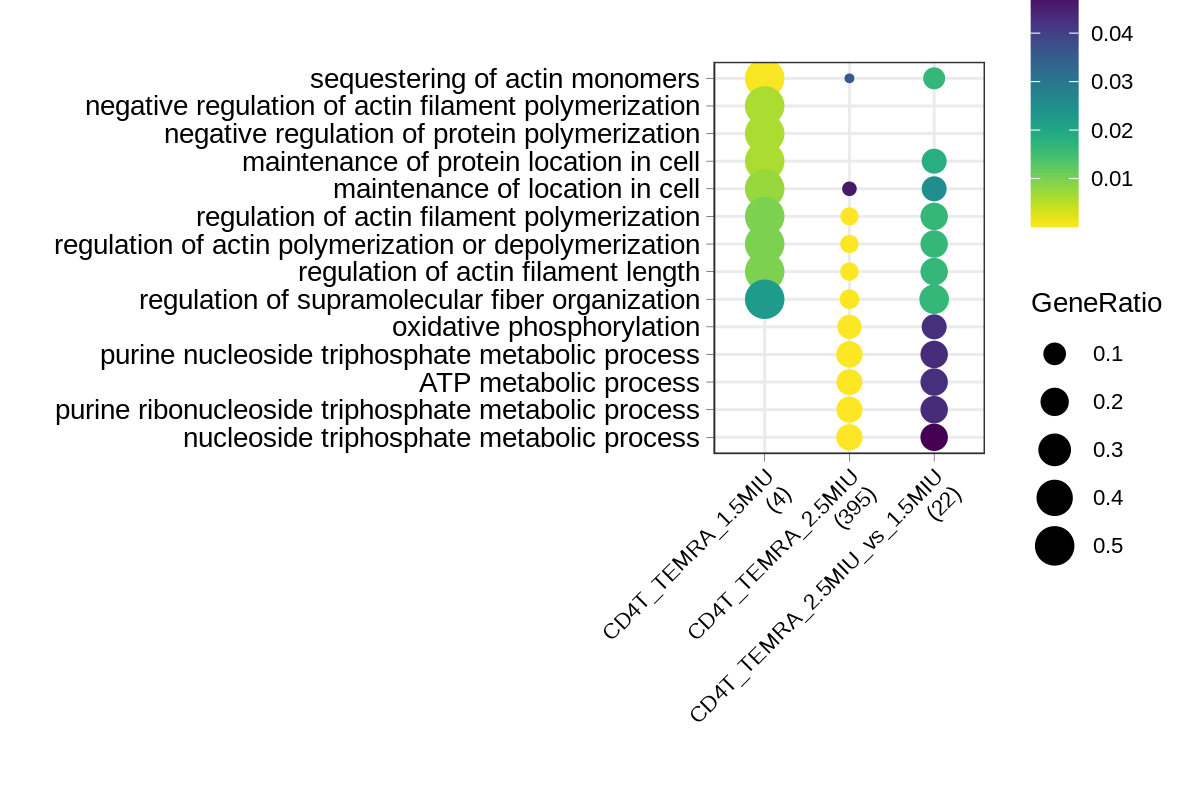

In [69]:
options(repr.plot.width = 6, repr.plot.height = 4, repr.plot.res = 200)
dotplot(res[['CD4T_TEMRA']]) + ktplots::small_axis(fontsize = 10) + viridis::scale_color_viridis(direction = -1)+ theme(axis.text.x = element_text(size=8, angle=45, hjust = 1))

In [68]:
library(ReactomePA)

ReactomePA v1.30.0  For help: https://guangchuangyu.github.io/ReactomePA

If you use ReactomePA in published research, please cite:
Guangchuang Yu, Qing-Yu He. ReactomePA: an R/Bioconductor package for reactome pathway analysis and visualization. Molecular BioSystems 2016, 12(2):477-479



In [69]:
res2 <- lapply(degs_sig, compareCluster, fun="enrichPathway", organism = 'human', readable = TRUE, universe = universeID)

In [88]:
names(res2)

[1] "CD4T_activated"     "CD4T_cm"            "CD4T_em"           
[4] "CD4T_IFN"           "CD4T_naive"         "CD4T_TEMRA"        
[7] "Treg"               "Treg_proliferating"

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



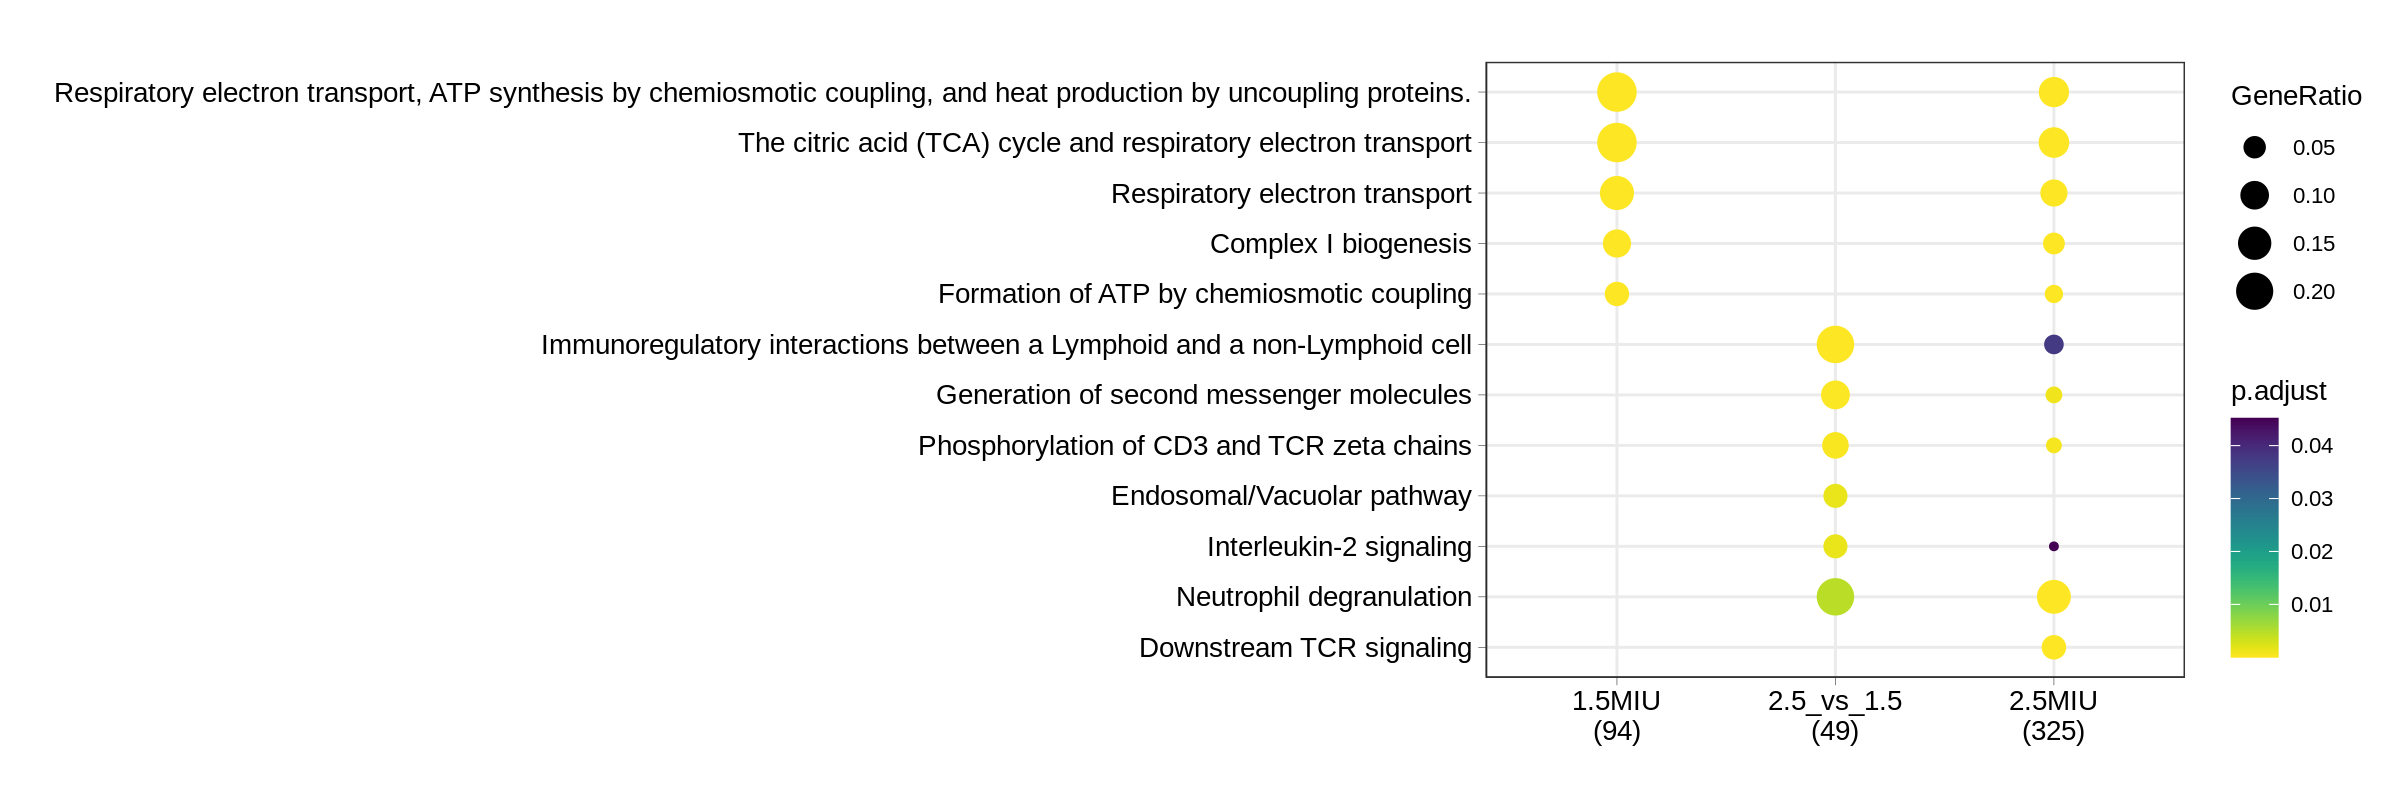

In [92]:
options(repr.plot.width = 12, repr.plot.height = 4, repr.plot.res = 200)
dotplot(res2[['Treg']]) + ktplots::small_axis(fontsize = 10) + viridis::scale_color_viridis(direction = -1)

In [73]:
names(res)

[1] "CD4T_activated"     "CD4T_cm"            "CD4T_em"           
[4] "CD4T_IFN"           "CD4T_naive"         "CD4T_TEMRA"        
[7] "Treg"               "Treg_proliferating"

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



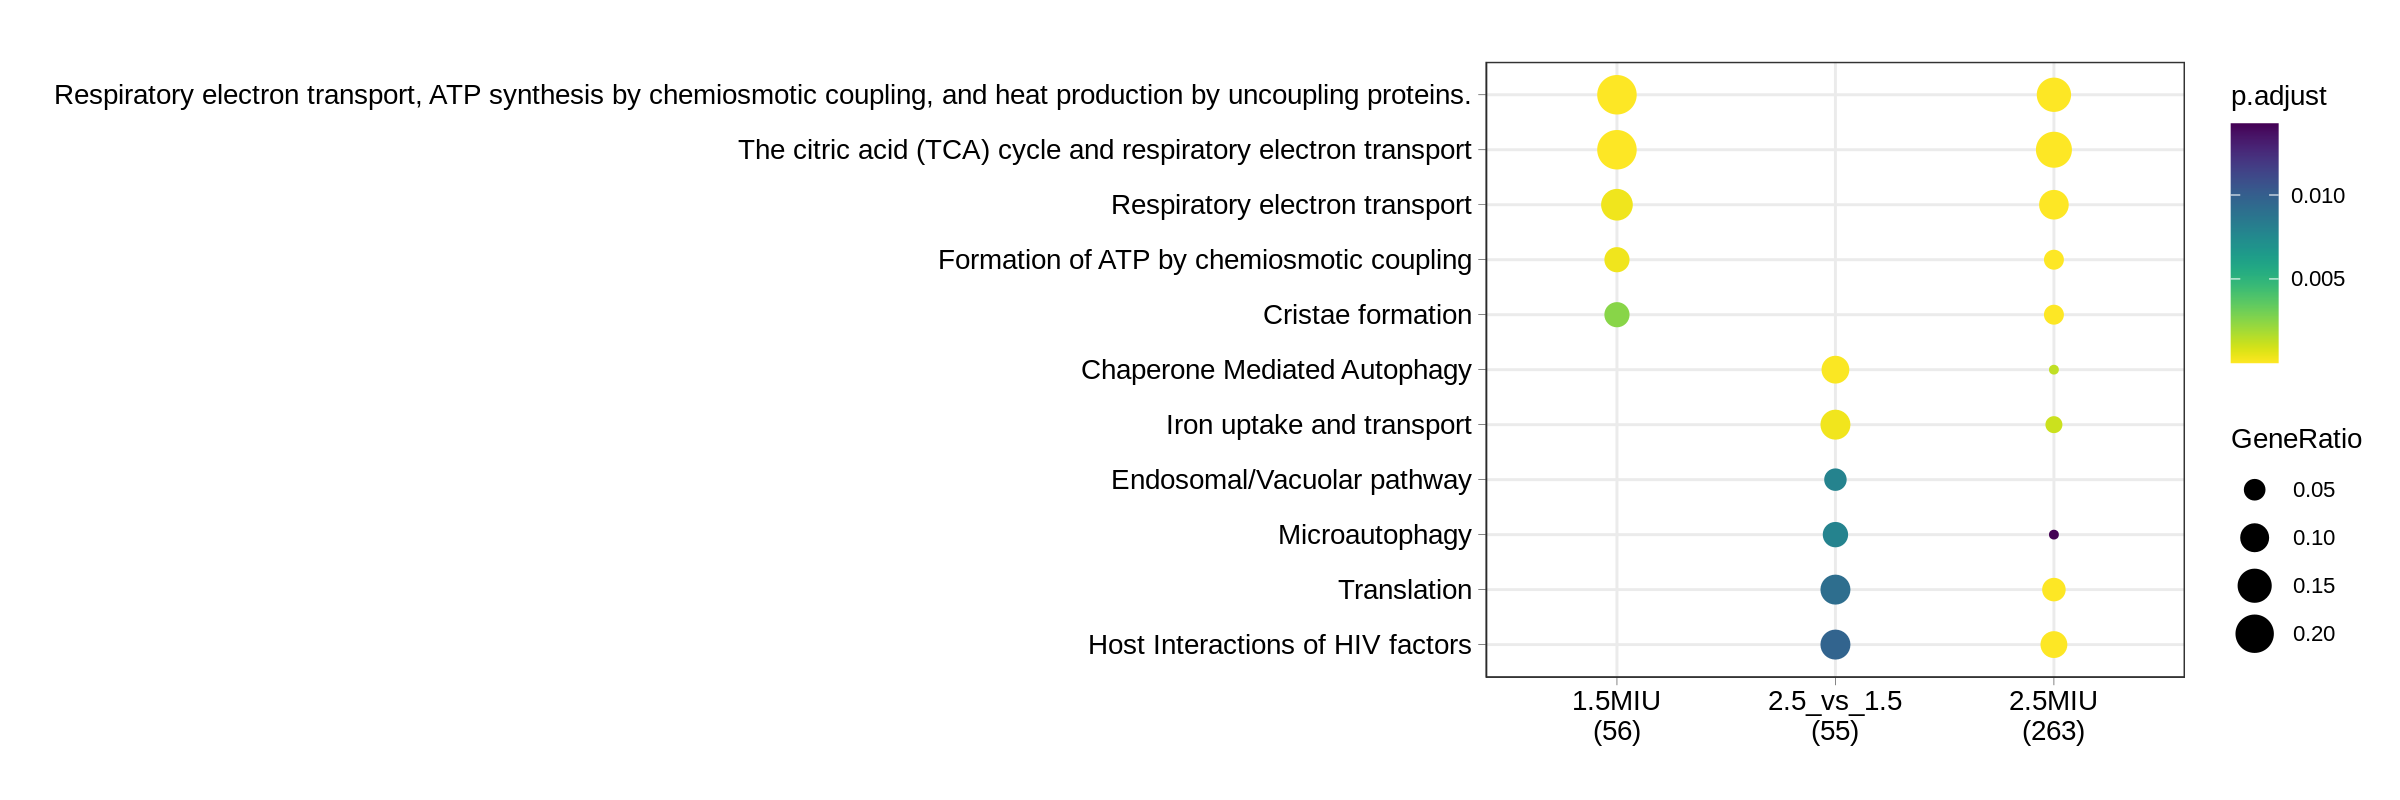

In [94]:
options(repr.plot.width = 12, repr.plot.height = 4, repr.plot.res = 200)
dotplot(res2[['CD4T_naive']]) + ktplots::small_axis(fontsize = 10) + viridis::scale_color_viridis(direction = -1)

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



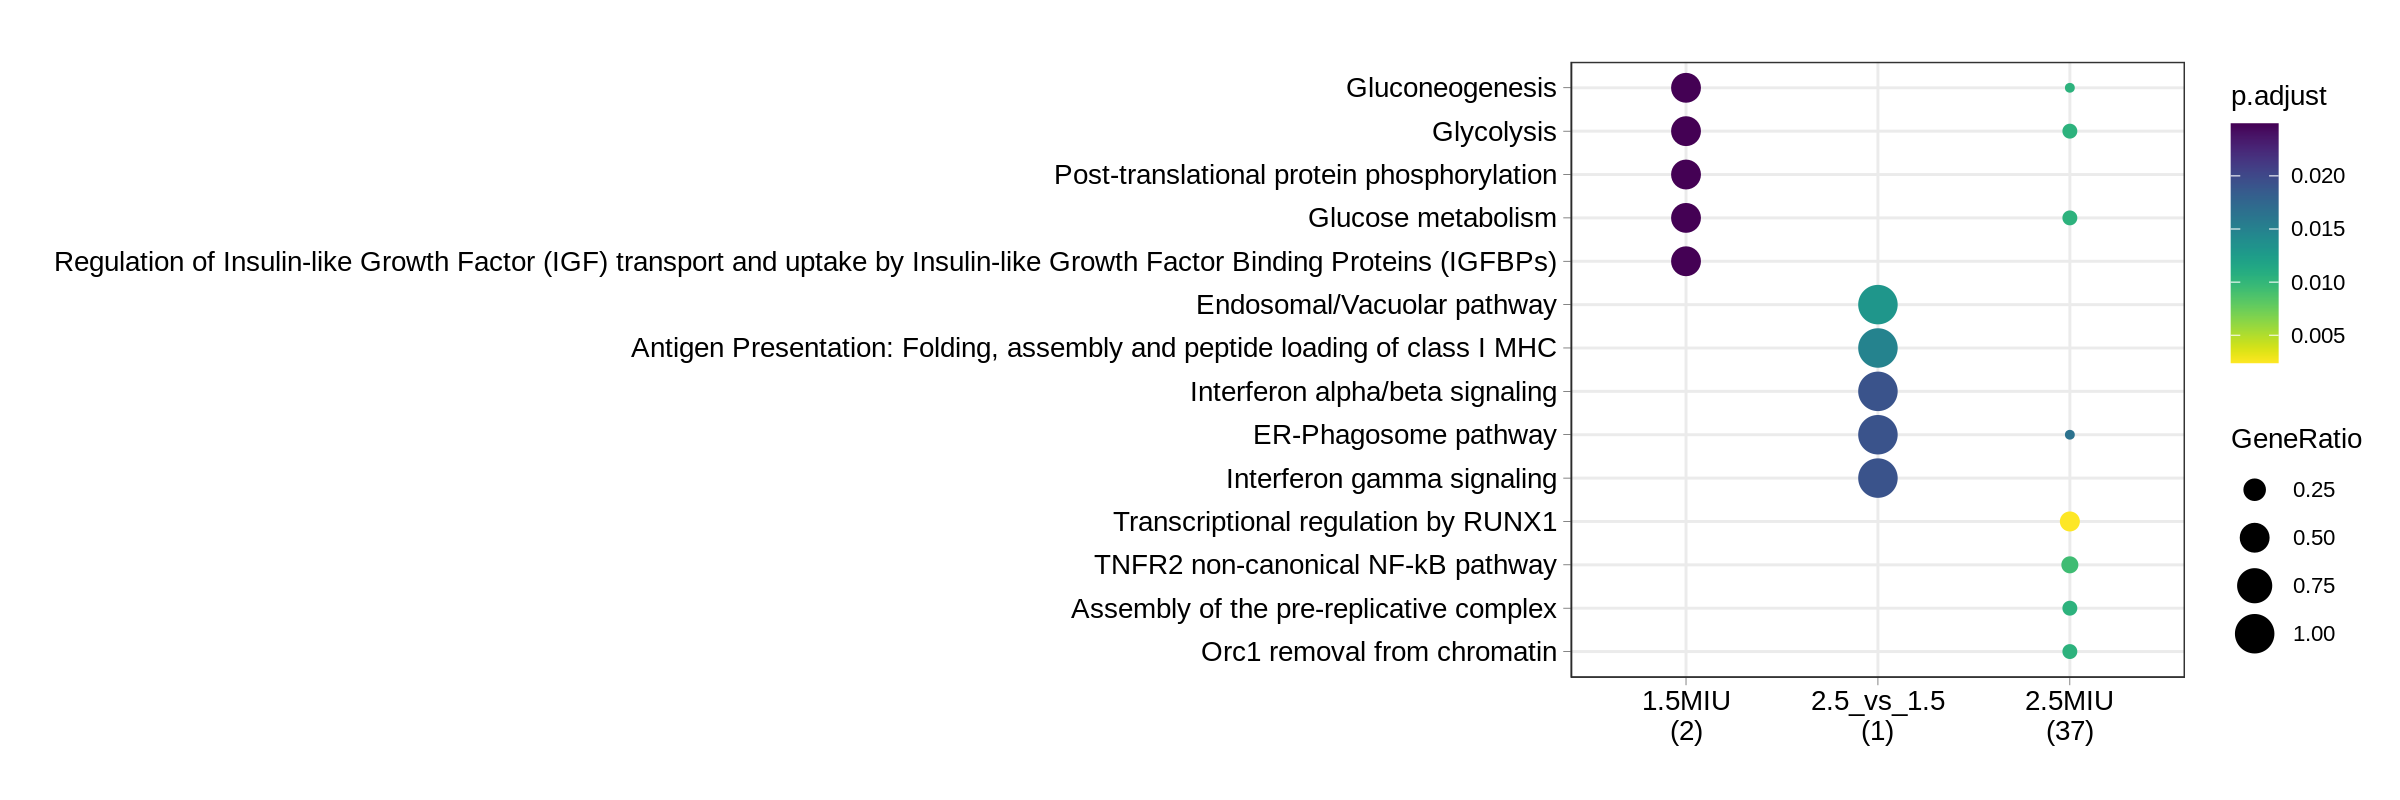

In [95]:
options(repr.plot.width = 12, repr.plot.height = 4, repr.plot.res = 200)
dotplot(res2[['Treg_proliferating']]) + ktplots::small_axis(fontsize = 10) + viridis::scale_color_viridis(direction = -1)

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



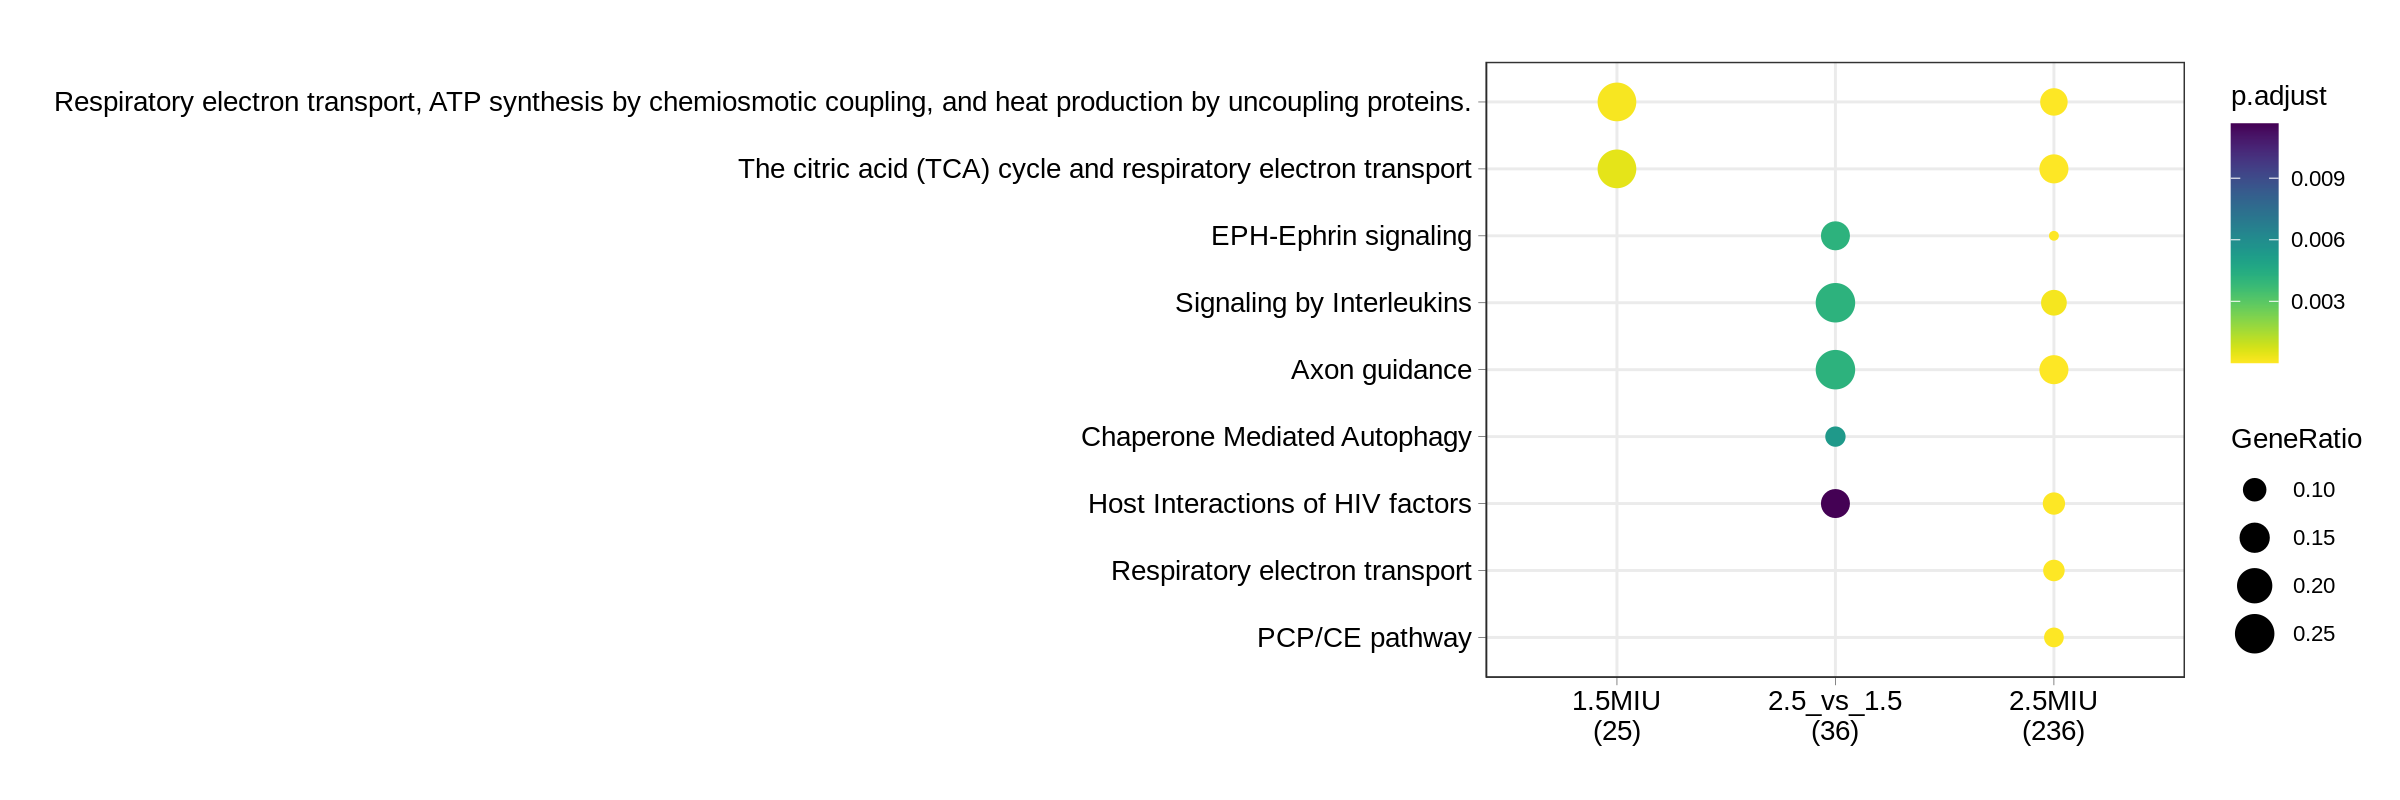

In [96]:
options(repr.plot.width = 12, repr.plot.height = 4, repr.plot.res = 200)
dotplot(res2[['CD4T_em']]) + ktplots::small_axis(fontsize = 10) + viridis::scale_color_viridis(direction = -1)

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



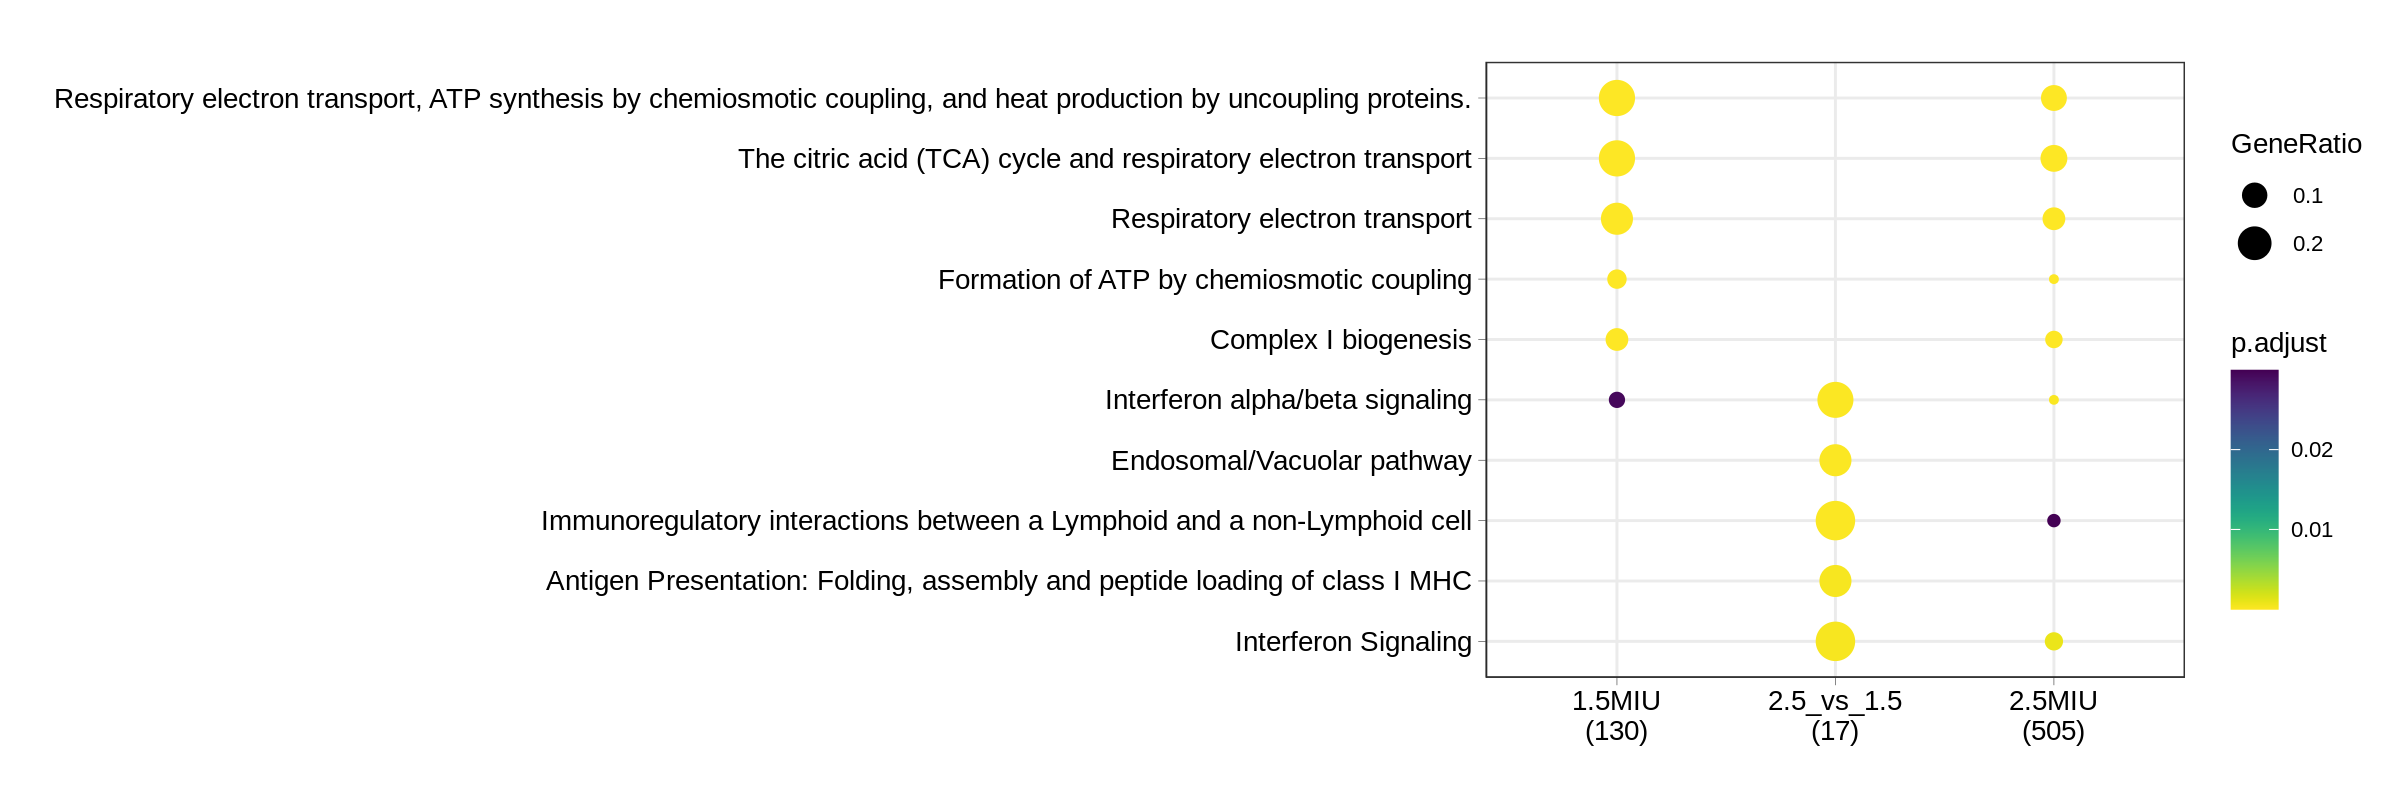

In [97]:
options(repr.plot.width = 12, repr.plot.height = 4, repr.plot.res = 200)
dotplot(res2[['CD4T_cm']]) + ktplots::small_axis(fontsize = 10) + viridis::scale_color_viridis(direction = -1)

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



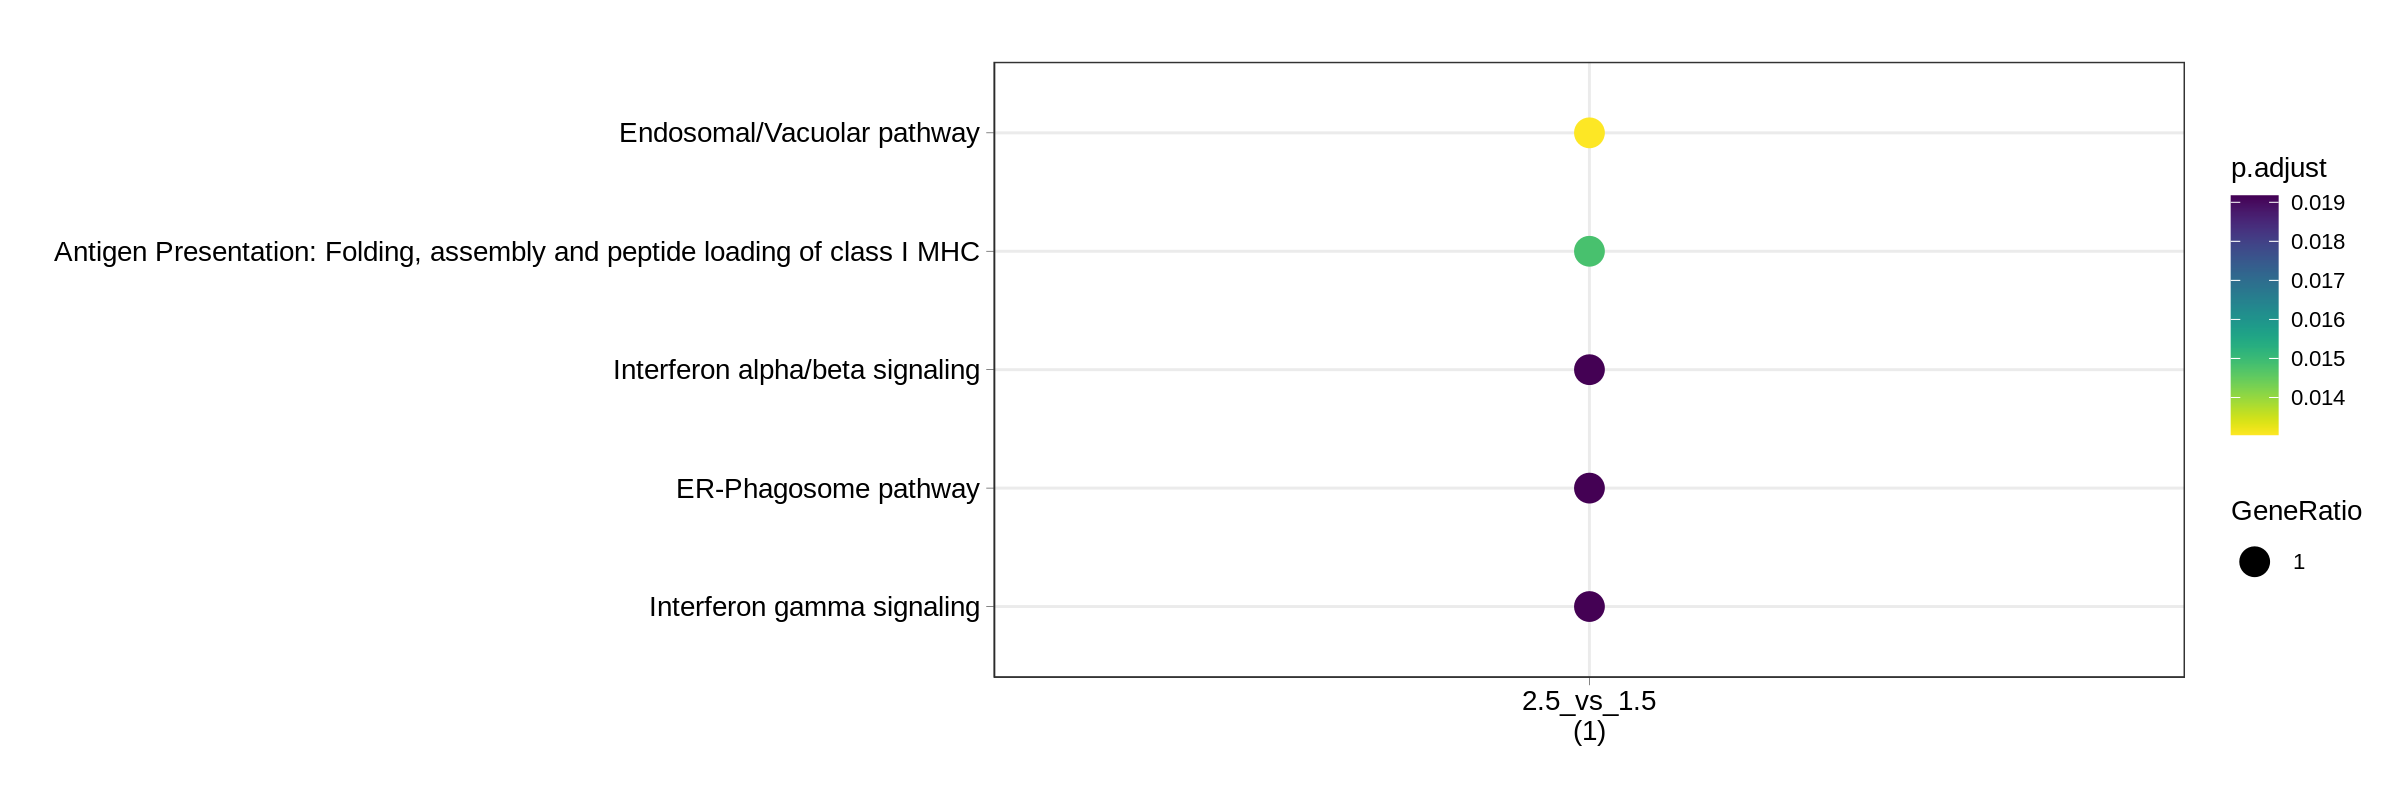

In [98]:
options(repr.plot.width = 12, repr.plot.height = 4, repr.plot.res = 200)
dotplot(res2[['CD4T_IFN']]) + ktplots::small_axis(fontsize = 10) + viridis::scale_color_viridis(direction = -1)

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



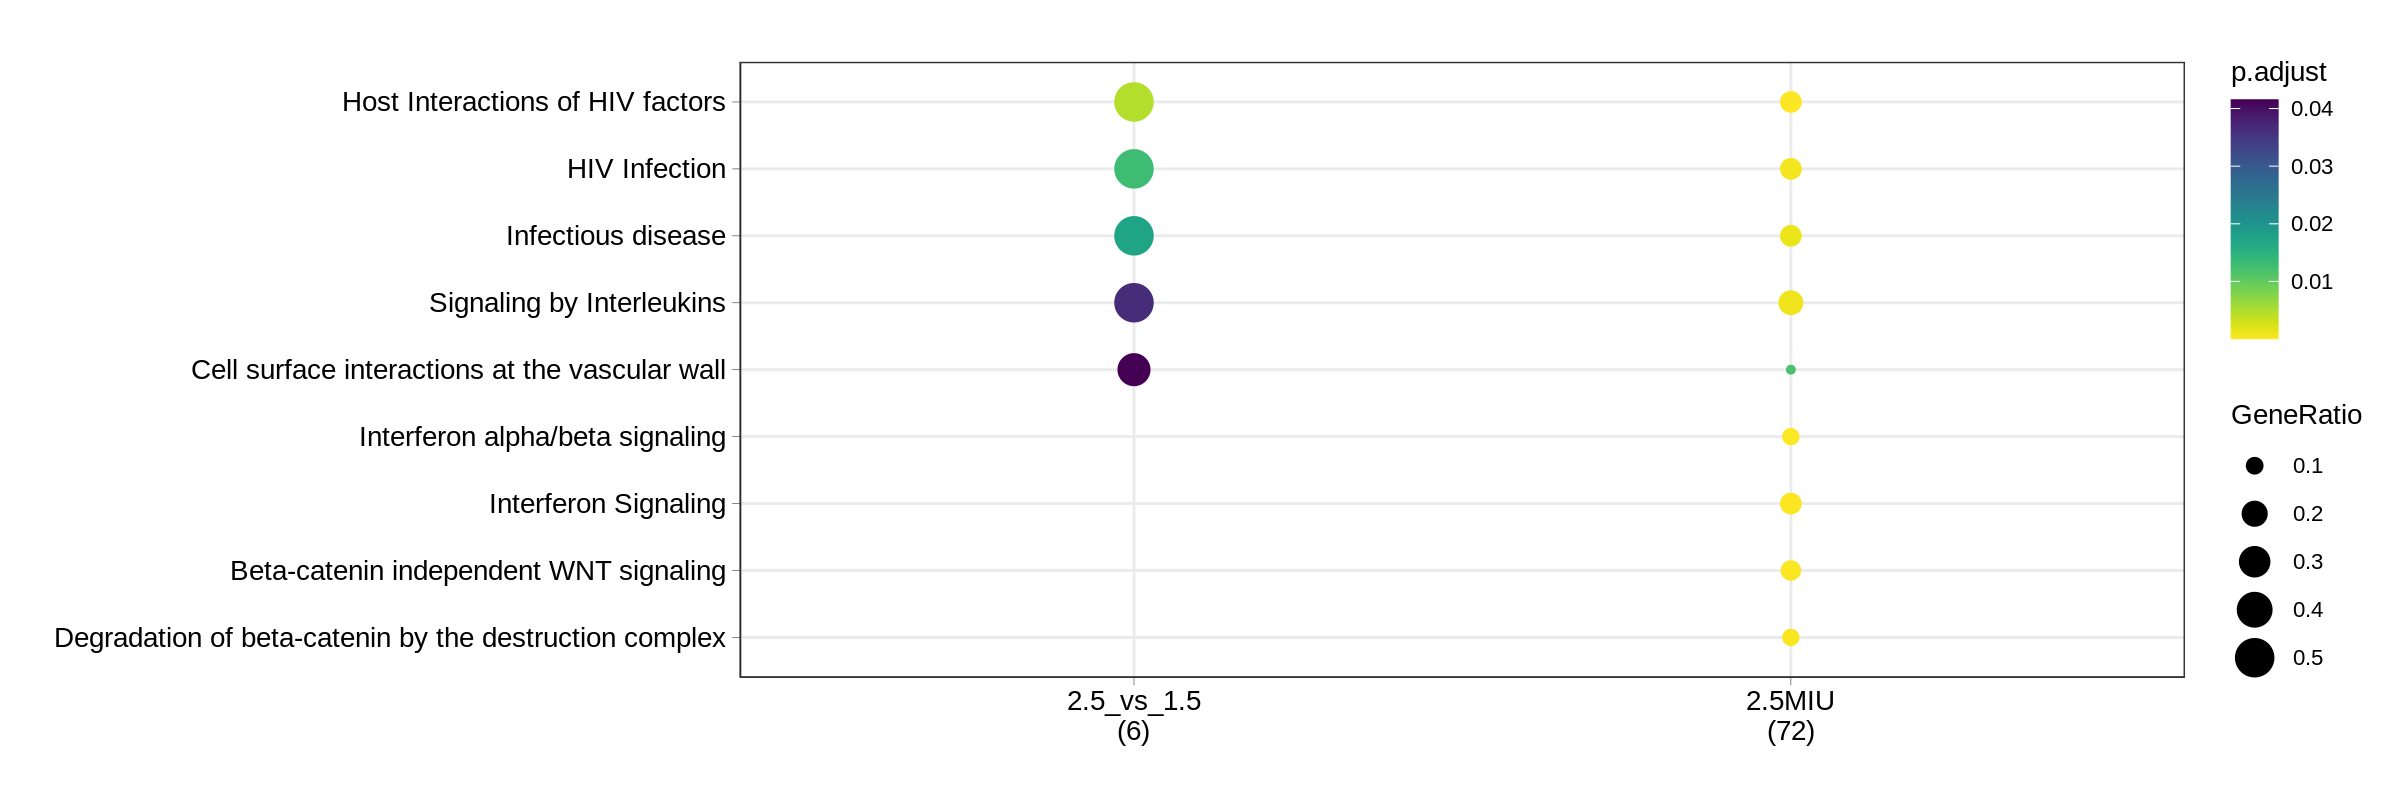

In [99]:
options(repr.plot.width = 12, repr.plot.height = 4, repr.plot.res = 200)
dotplot(res2[['CD4T_activated']]) + ktplots::small_axis(fontsize = 10) + viridis::scale_color_viridis(direction = -1)

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



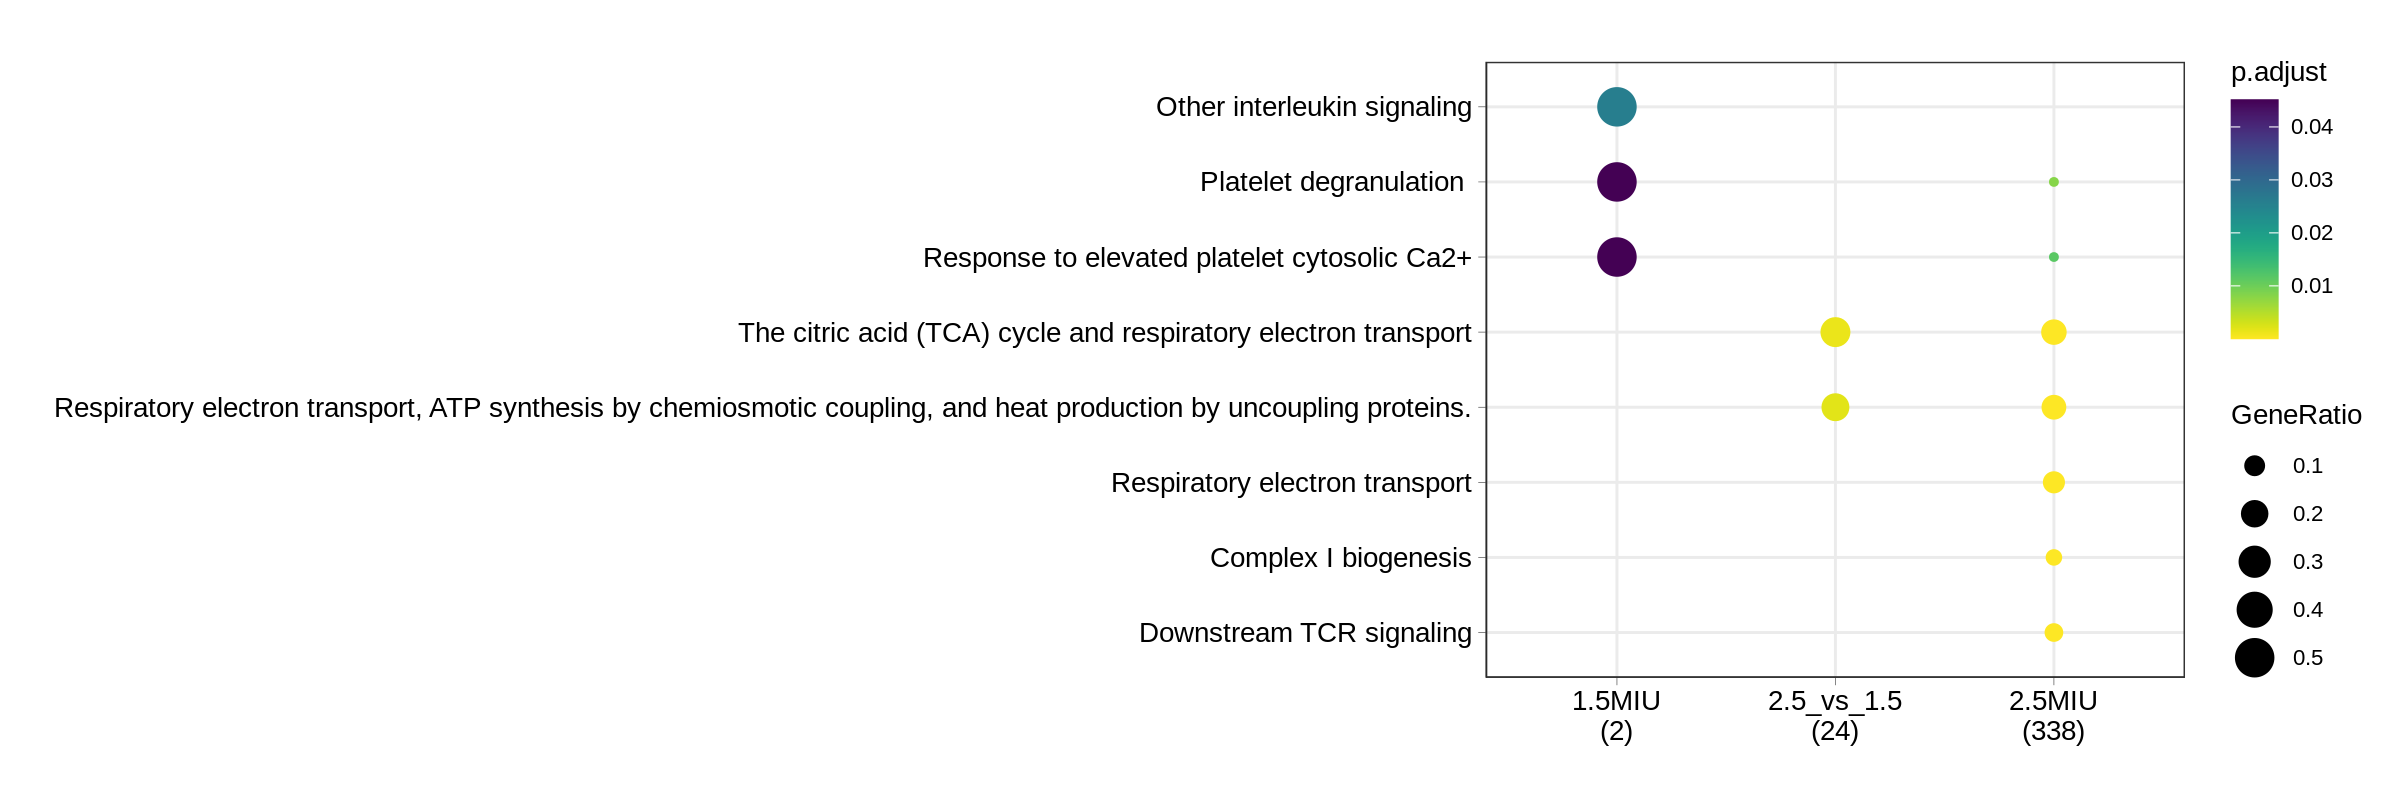

In [100]:
options(repr.plot.width = 12, repr.plot.height = 4, repr.plot.res = 200)
dotplot(res2[['CD4T_TEMRA']]) + ktplots::small_axis(fontsize = 10) + viridis::scale_color_viridis(direction = -1)